Data Discovery with Visualization
==================

In this notebook we will explore how to use python to discover descriptive attributes of various data.

There are thirteen data files contained in the sub-directory `dat/`, with the path and generic basename `dat/dataset_k{:02d}.tsv`. These tab separated value files contain two columns of floats, `x` and `y`.

We will first explore the data by computing summary statistics.

- - -

In [1]:
# Import required modules
import pandas as pd
import numpy as np
import glob,natsort
# Generate a list of `tsv` files and sort the list
F = natsort.realsorted(glob.glob('dat/dataset_K*.tsv'))
# Generate a list of DataFrames with list index -> dataset index
dfs = [ pd.read_csv(f,delimiter='\t') for f in F ]

In [7]:
# Useful function
def gen_summary_statistics(df):
    methods = [ 
        df.mean, 
        df.std, 
        df.skew, 
        df.kurt,
    ]
    return np.r_[
        np.array([ method().values for method in methods ]).flatten(),
        df.corr().values[1,0]
    ]

# Column names of generated summary stats
cols = [
    'x_mean','y_mean',
    'x_std', 'y_std',
    'x_skew','y_skew',
    'x_kurt','y_kurt',
    'corr',
]

In [8]:
# Loop through DataFrames and generate summary statistics DataFrame
sdf = pd.DataFrame([ gen_summary_statistics(df) for df in dfs ], columns=cols)
sdf

,x_mean,y_mean,x_std,y_std,x_skew,y_skew,x_kurt,y_kurt,corr
0,54.266100,47.834721,16.769825,26.939743,-0.024390,-0.095250,-1.218337,-1.259209,-0.064128
1,54.268730,47.830823,16.769239,26.935727,0.171898,0.012490,-0.194127,-1.440354,-0.068586
2,54.267320,47.837717,16.760013,26.930036,0.031141,0.005001,-0.615411,-1.806974,-0.068343
3,54.263273,47.832253,16.765142,26.935403,0.286787,0.252571,-0.212295,-1.029939,-0.064472
4,54.260303,47.839829,16.767735,26.930192,-0.125287,0.150863,-0.827782,-1.392821,-0.060341
5,54.261442,47.830252,16.765898,26.939876,0.245991,0.151930,-0.285289,-1.131612,-0.061715
6,54.268805,47.835450,16.766704,26.939998,0.193225,0.206823,-0.208228,-1.806202,-0.068504
7,54.267849,47.835896,16.766759,26.936105,0.257560,0.191361,-0.185287,-0.909828,-0.068980
8,54.265882,47.831496,16.768853,26.938608,0.234855,0.260936,-0.314707,-1.061217,-0.068609
9,54.267341,47.839545,16.768959,26.930275,0.083232,0.242345,-1.160973,-1.340329,-0.062961


In [9]:
# Get to the visualizin
import pylab as plt
from plt_style import *
def mk_grids(): 
    plt.grid(which='major',linestyle='--',color='#333333')
    plt.grid(which='minor',linestyle=':',color='#555555')

Text(0.5, 1.0, 'Mean Comparison')

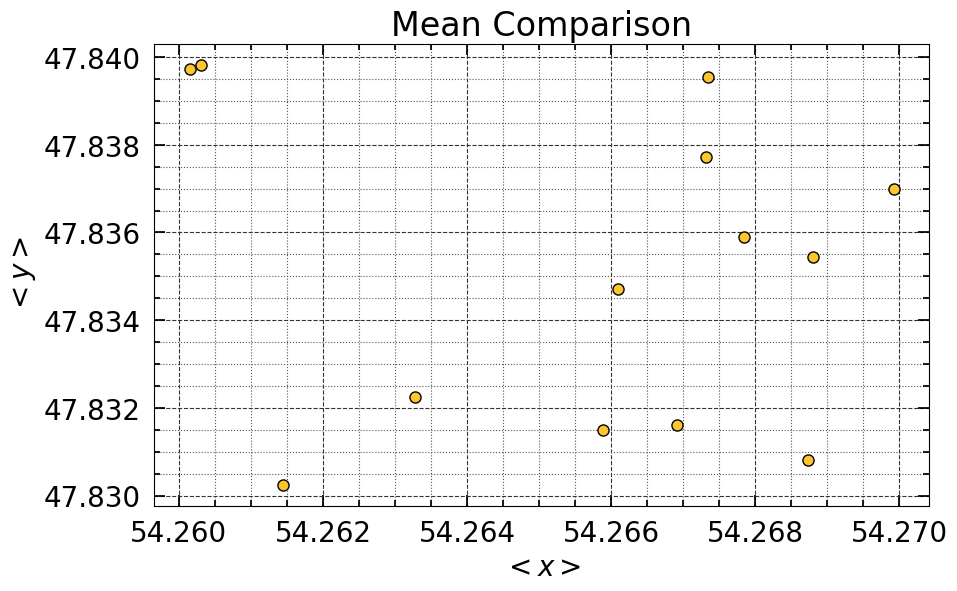

In [10]:
plt.plot(sdf.x_mean,sdf.y_mean,'o',mec='k',mfc=gld,ms=8); mk_grids()
plt.xlabel('$<x>$')
plt.ylabel('$<y>$')
plt.title('Mean Comparison')

Text(0.5, 1.0, 'Standard Dev. Comparison')

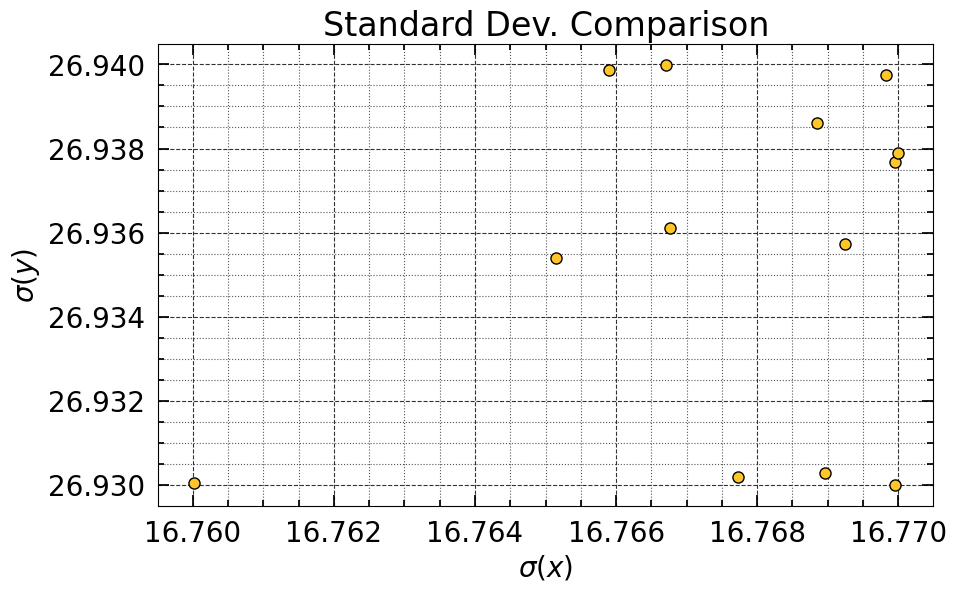

In [11]:
plt.plot(sdf.x_std,sdf.y_std,'o',mec='k',mfc=gld,ms=8); mk_grids()
plt.xlabel('$\sigma(x)$')
plt.ylabel('$\sigma(y)$')
plt.title('Standard Dev. Comparison')

Text(0.5, 1.0, 'Signal to Noise Comparison')

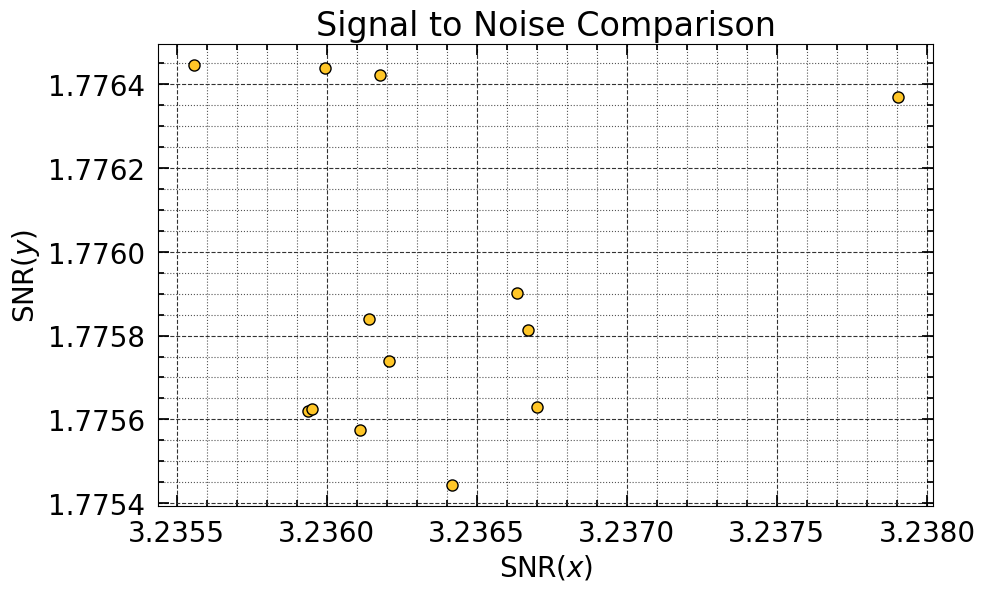

In [12]:
plt.plot(sdf.x_mean/sdf.x_std,sdf.y_mean/sdf.y_std,'o',mec='k',mfc=gld,ms=8); mk_grids()
plt.xlabel(r'SNR$(x)$')
plt.ylabel(r'SNR$(y)$')
plt.title('Signal to Noise Comparison')

Text(0.5, 1.0, 'Correlation Comparison')

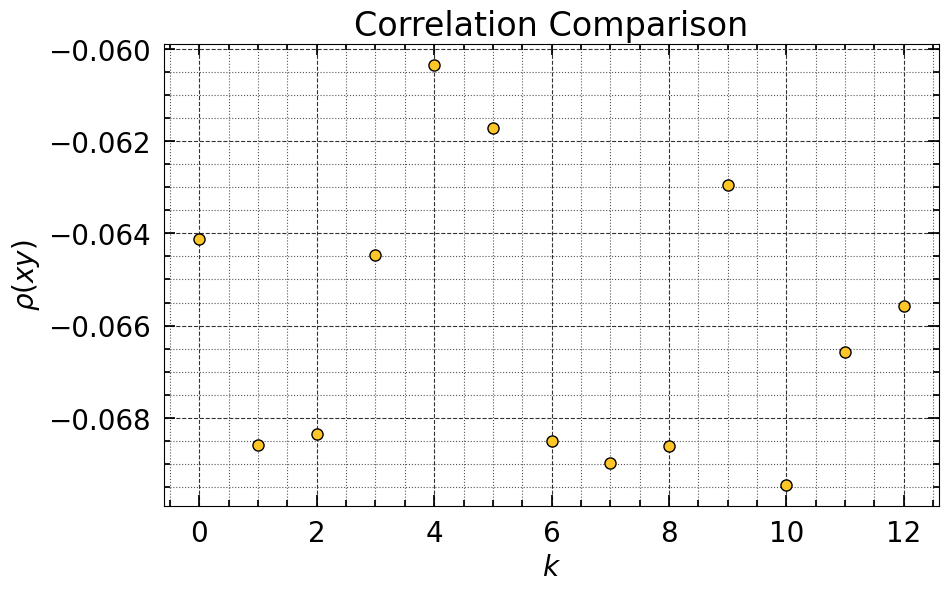

In [13]:
plt.plot(sdf['corr'],'o',mec='k',mfc=gld,ms=8); mk_grids()
plt.xlabel(r'$k$')
plt.ylabel(r'$\rho(xy)$')
plt.title('Correlation Comparison')

Text(0.5, 1.0, 'Skewness Comparison')

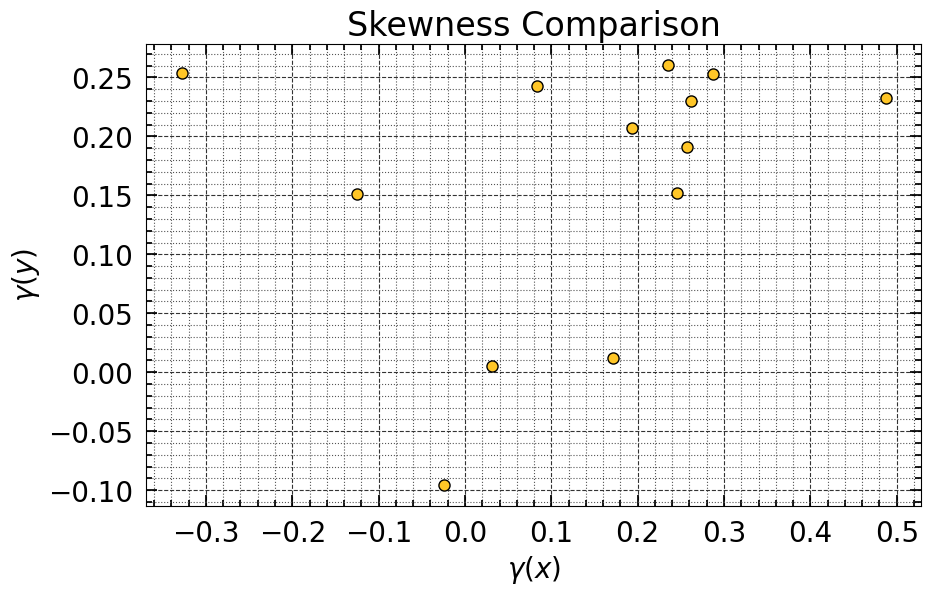

In [14]:
plt.plot(sdf['x_skew'],sdf['y_skew'],'o',mec='k',mfc=gld,ms=8); mk_grids()
plt.xlabel(r'$\gamma(x)$')
plt.ylabel(r'$\gamma(y)$')
plt.title('Skewness Comparison')

Text(0.5, 1.0, 'Kurtosis Comparison')

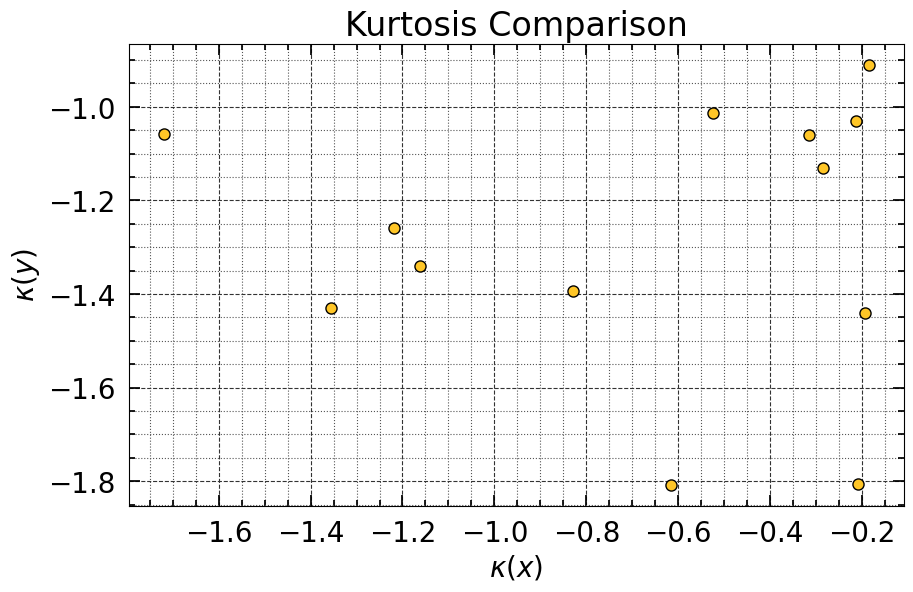

In [15]:
plt.plot(sdf['x_kurt'],sdf['y_kurt'],'o',mec='k',mfc=gld,ms=8); mk_grids()
plt.xlabel(r'$\kappa(x)$')
plt.ylabel(r'$\kappa(y)$')
plt.title('Kurtosis Comparison')

- - - 

What do the data actually look like?
---

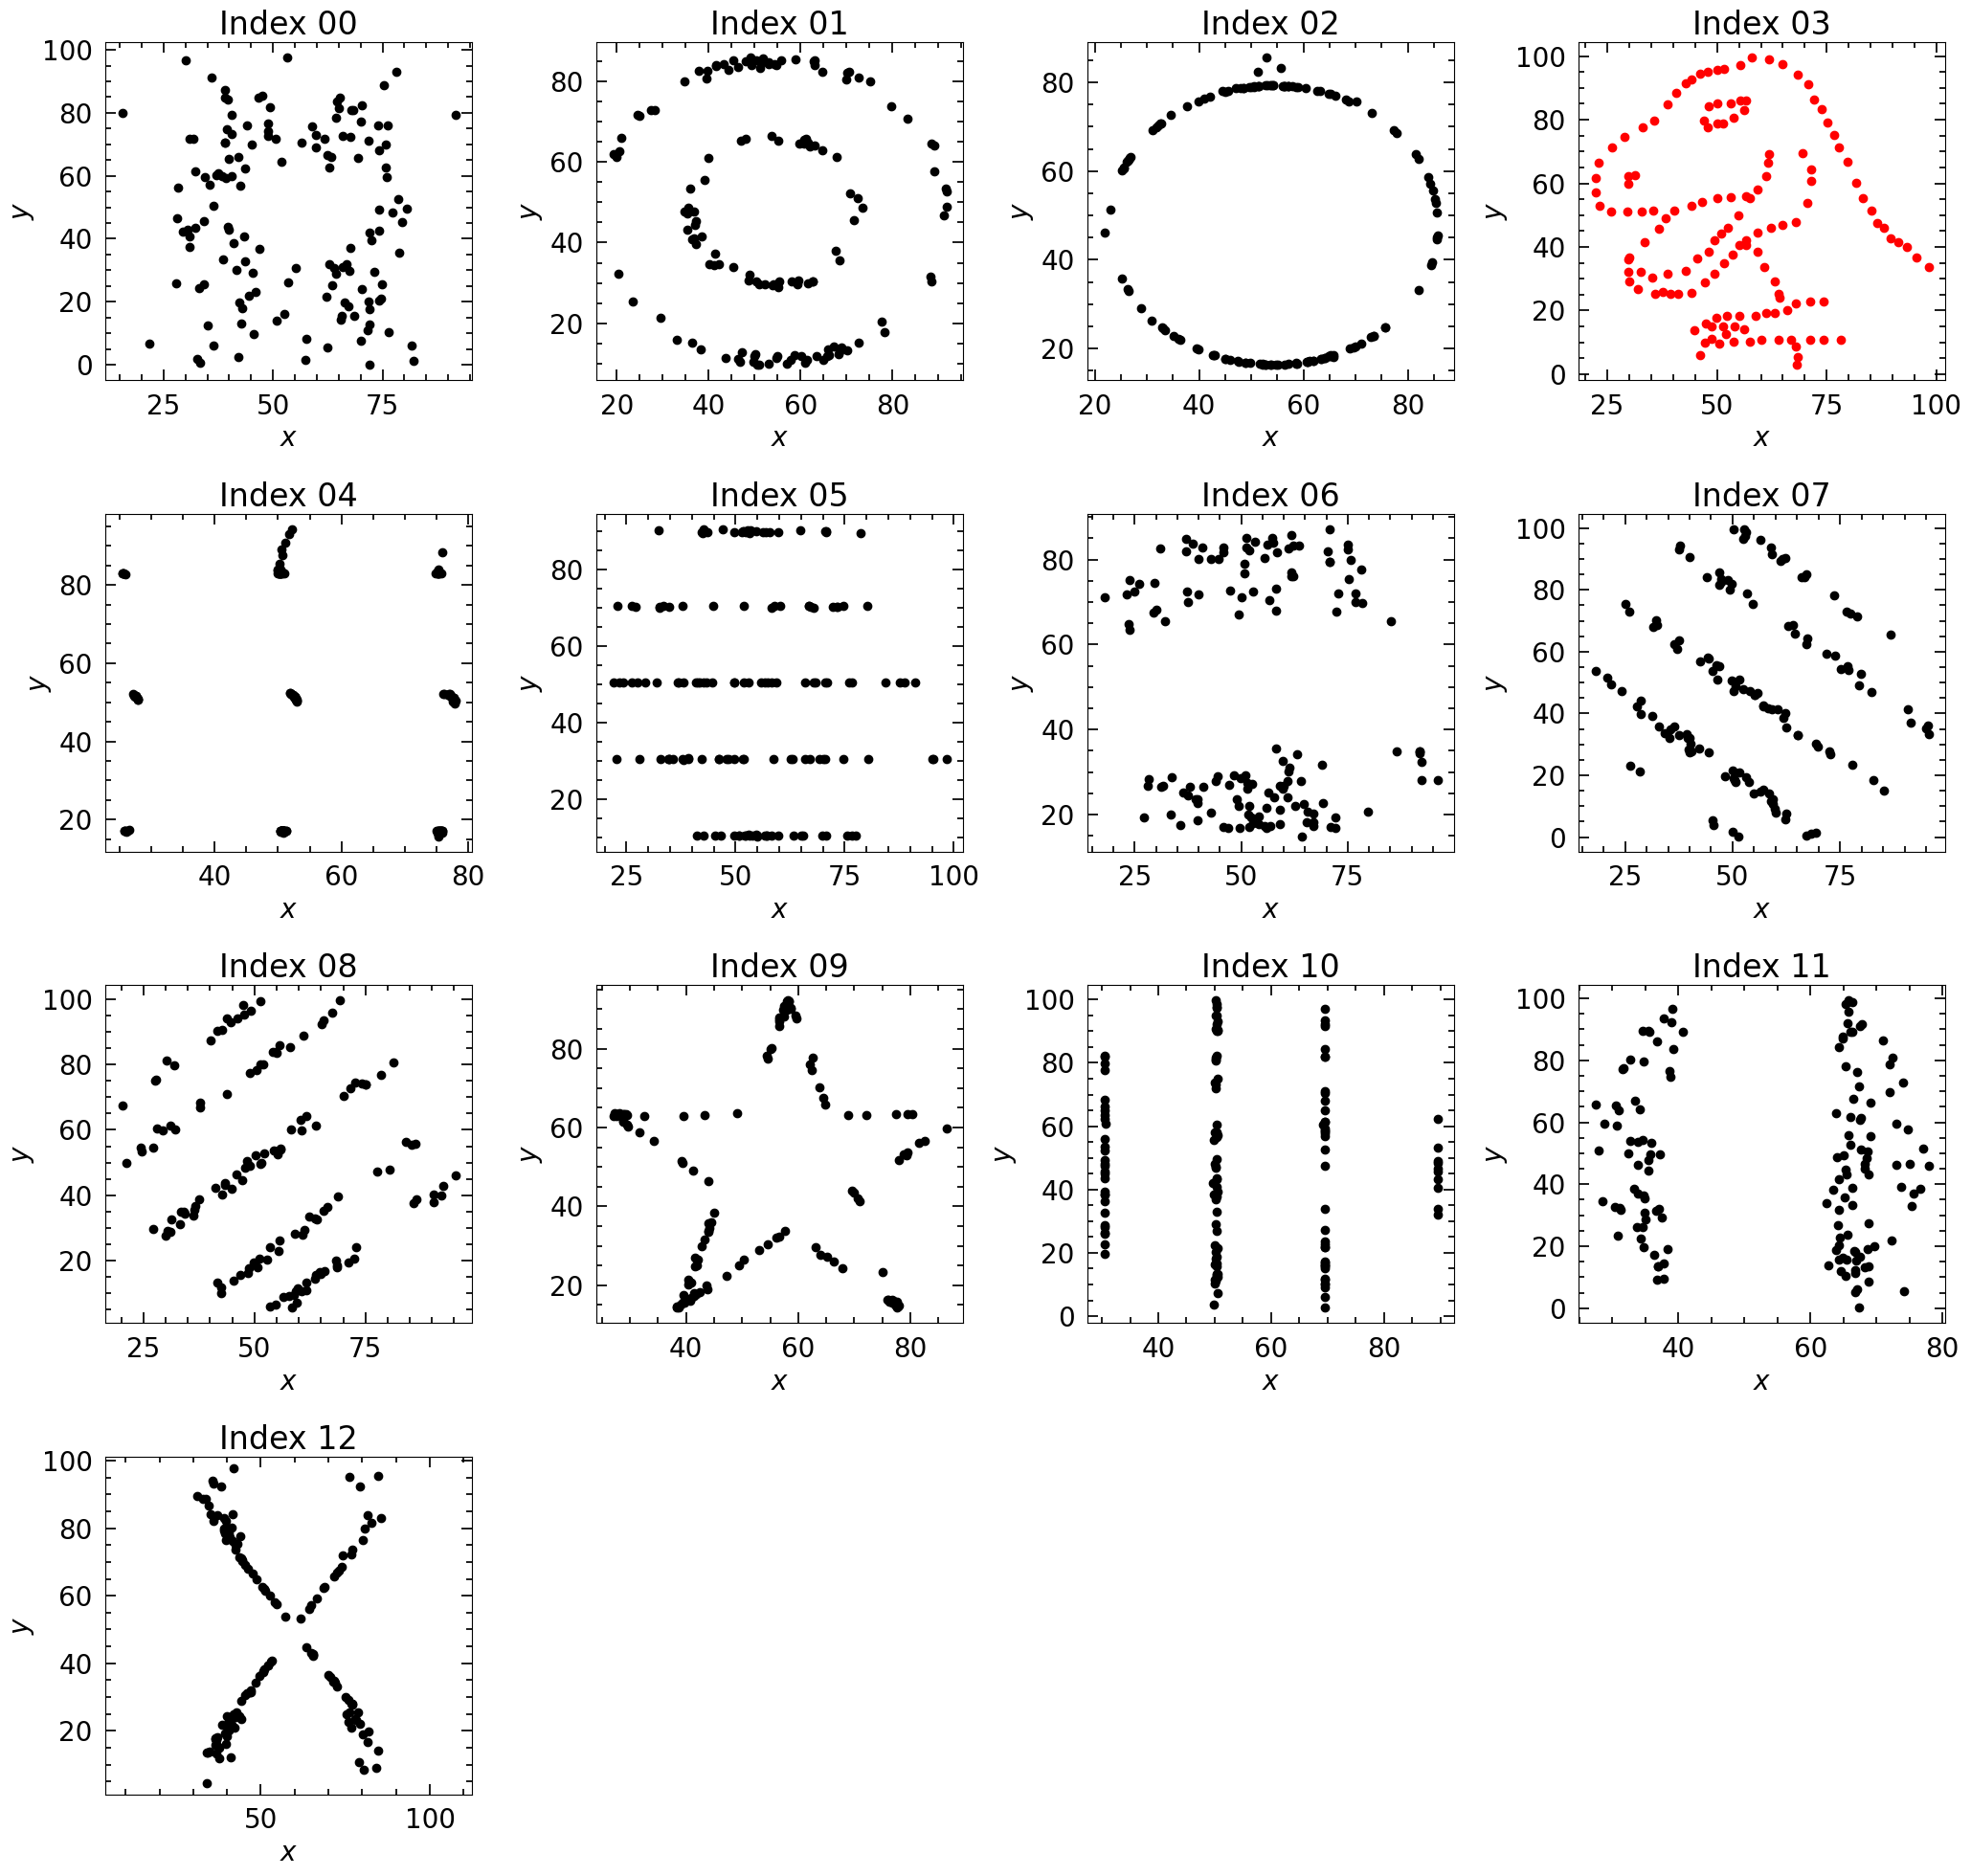

In [16]:
f,axarr = plt.subplots(4,4,figsize=(21,20))
# Only 13 plots, remove last 3 empty frames
f.delaxes(axarr[-1,-3])
f.delaxes(axarr[-1,-2])
f.delaxes(axarr[-1,-1])
# loop over dataframes and plot data
for k,df in enumerate(dfs):
    ax = axarr[k//4,k%4]
    ax.plot(df.x,df.y,'o',c='k' if k != 3 else 'r')
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$') 
    ax.set_title(f'Index {k:02d}')
plt.axis('equal')    
plt.tight_layout()

---------------------------------------


![Anscombe.png](fig/anscombe.png)

Data and more from [this blog post](https://www.autodeskresearch.com/publications/samestats).
